In [3]:
!pip install brian2
from brian2 import *

     |████████████████████████████████| 1.2MB 7.8MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257138 sha256=814a72177cc2199cb6ea50c33f160469e2ac78592f7e8f314b29e744fc1b79fd
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [5]:
taupre      = taupost = 30*ms
Apre        = 0.05
Apost       = -Apre*taupre/taupost*1.05
tmax        = 75*ms
N           = 100

In [6]:
pre         = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
post        = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
pre.tspike  = 'i*tmax/(N-1)'
post.tspike = '(N-1-i)*tmax/(N-1)'

In [7]:
S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(j='i')


In [8]:
run(tmax+1*ms)

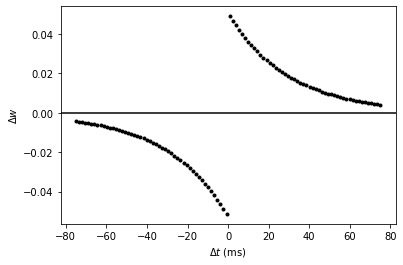

In [9]:
plot((post.tspike-pre.tspike)/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')
show()